In [1]:
import pandas as pd
import numpy as np
covid=pd.read_csv('covidus.csv')

In [2]:
covid.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


##### Observation:
    Lat                 = Latitude.
    Long_               = Longitude.
    Confirmed           = Aggregated confirmed case count for the state.
    Deaths              = Aggregated Death case count for the state.
    Recovered           = Aggregated Recovered case count for the state.
    Active              = Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
    FIPS                = Federal Information Processing Standards code that uniquely identifies counties within the USA.
    Incident_Rate       = confirmed cases per 100,000 persons.
    People_Tested       = Total number of people who have been tested.
    People_Hospitalized = Total number of people hospitalized.
    Mortality_Rate      = Number recorded deaths * 100/ Number confirmed cases.
    UID                 = Unique Identifier for each row entry.
    ISO3                = Officialy assigned country code identifiers.
    Testing_Rate        = Total number of people tested per 100,000 persons.
    Hospitalization_Rate= Total number of people hospitalized * 100/ Number of confirmed cases.
    
    Are the columns given and our target variabels are Deaths and Recovered.


In [3]:
for column in covid.columns:
    print(f"{column}: Number of unique values {covid[column].nunique()}")
    print('------------------------------------------------------------')

Province_State: Number of unique values 58
------------------------------------------------------------
Country_Region: Number of unique values 1
------------------------------------------------------------
Last_Update: Number of unique values 1
------------------------------------------------------------
Lat: Number of unique values 56
------------------------------------------------------------
Long_: Number of unique values 56
------------------------------------------------------------
Confirmed: Number of unique values 58
------------------------------------------------------------
Deaths: Number of unique values 56
------------------------------------------------------------
Recovered: Number of unique values 42
------------------------------------------------------------
Active: Number of unique values 58
------------------------------------------------------------
FIPS: Number of unique values 58
------------------------------------------------------------
Incident_Rate: Number

##### Observation:
    *Hence Country_Region,Last_Update as only one unique value we can drop that columns.
    * Columns like lat and long_ are exact Latitude,Longitude values of that Location . we already have loaction name so we can drop Lat and Long_ columns.
    * UID and FIPS are like ID numbers so every  row will have unique value so we can drop them.

In [4]:
covid=covid.drop(['Country_Region','Last_Update','Lat','Long_','UID','FIPS'],axis=1)

In [5]:
covid.tail()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,32908,1075,4523.0,27310.0,385.541875,212626.0,6059.0,3.266683,USA,2491.072892,18.411936
54,Washington,18971,1037,NaN,17934.0,249.130224,293120.0,NaN,5.466238,USA,3849.298999,NaN
55,West Virginia,1567,69,950.0,548.0,87.437024,80641.0,NaN,4.403318,USA,4499.686689,NaN
56,Wisconsin,13413,481,7728.0,5204.0,230.367575,167713.0,2161.0,3.586073,USA,2880.462020,16.111235
57,Wyoming,787,11,528.0,248.0,135.980607,18840.0,74.0,1.397713,USA,3255.240955,9.402795


In [6]:
covid.shape

(58, 12)

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Confirmed             58 non-null     int64  
 2   Deaths                58 non-null     int64  
 3   Recovered             42 non-null     float64
 4   Active                58 non-null     float64
 5   Incident_Rate         56 non-null     float64
 6   People_Tested         56 non-null     float64
 7   People_Hospitalized   33 non-null     float64
 8   Mortality_Rate        57 non-null     float64
 9   ISO3                  58 non-null     object 
 10  Testing_Rate          56 non-null     float64
 11  Hospitalization_Rate  33 non-null     float64
dtypes: float64(8), int64(2), object(2)
memory usage: 5.6+ KB


##### Observation:
    Province_State,ISO3 are object type Remaining are int and float type

In [8]:
#checking for null values
covid.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

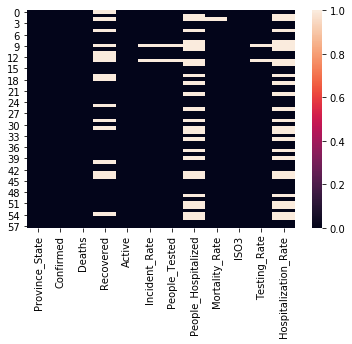

In [9]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(covid.isnull())
plt.show()

In [10]:
# Let us replace NaN values with most_frequent
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
list1=['Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']
for val in list1:
    covid[val]=imp.fit_transform(covid[val].values.reshape(-1,1))

In [11]:
covid.isnull().sum()

Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

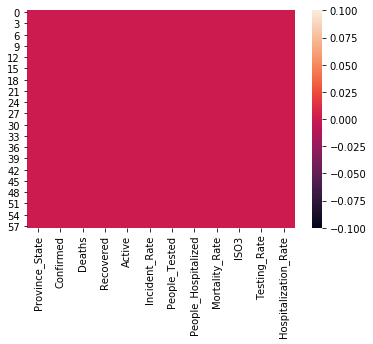

In [12]:
#using heatmap to check null values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(covid.isnull())
plt.show()

In [13]:
covid.describe()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,26756.086207,1611.017241,7007.428571,20070.724138,396.230806,2.258534e+05,4897.454545,4.458248,3894.186870,14.342541
std,52562.031122,4084.750891,9901.304545,41294.705318,395.554852,2.934948e+05,9879.577790,2.116191,1898.951207,3.781861
min,0.000000,0.000000,13.000000,0.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,2596.000000,74.000000,1281.750000,812.500000,154.909239,4.745000e+04,1454.500000,3.116158,2741.843521,12.829963
50%,10148.500000,385.000000,4987.000000,5644.500000,259.009335,1.433085e+05,4897.454545,4.409323,3501.526835,14.342541
75%,29395.500000,1394.250000,7007.428571,19291.250000,462.828082,2.646656e+05,4897.454545,5.450908,4622.586404,15.552021
max,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


##### Observation:
         * There is some Huge difference between mean and std in columns like Confirmed,Deaths,Recovered,Active,People_Hospitalized,Testing_Rate and Hospitalization_Rate
         * There is some Huge Difference between 75% and Max in Columns like Confirmed,Deaths,Recovered,Active,People_Hospitalized,Testing_Rate and Hospitalization_Rate
         * This means there outliers in data

In [14]:
#let us convert object type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Province_State','ISO3']
for val in list1:
    covid[val]=le.fit_transform(covid[val])

In [15]:
covid.tail()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
53,53,32908,1075,4523.000000,27310.0,385.541875,212626.0,6059.000000,3.266683,4,2491.072892,18.411936
54,54,18971,1037,7007.428571,17934.0,249.130224,293120.0,4897.454545,5.466238,4,3849.298999,14.342541
55,55,1567,69,950.000000,548.0,87.437024,80641.0,4897.454545,4.403318,4,4499.686689,14.342541
56,56,13413,481,7728.000000,5204.0,230.367575,167713.0,2161.000000,3.586073,4,2880.462020,16.111235
57,57,787,11,528.000000,248.0,135.980607,18840.0,74.000000,1.397713,4,3255.240955,9.402795


In [16]:
covid1=covid.corr()
covid1

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,0.006490,0.015229,0.067595,-0.027612,-0.078280,-0.065428,5.461319e-03,0.019090,1.967772e-01,0.083183,-1.316941e-01
Confirmed,0.006490,1.000000,0.982191,0.822547,0.985218,0.708436,0.824136,8.692673e-01,0.382537,1.099993e-01,0.332464,2.874708e-01
Deaths,0.015229,0.982191,1.000000,0.830223,0.954378,0.710105,0.739634,9.082786e-01,0.427127,8.558846e-02,0.344465,2.982254e-01
Recovered,0.067595,0.822547,0.830223,1.000000,0.725085,0.542795,0.711255,7.618294e-01,0.322160,6.807968e-02,0.220597,2.316917e-01
Active,-0.027612,0.985218,0.954378,0.725085,1.000000,0.700926,0.826144,8.359377e-01,0.367626,1.048243e-01,0.321395,2.845637e-01
Incident_Rate,-0.078280,0.708436,0.710105,0.542795,0.700926,1.000000,0.441669,5.510764e-01,0.353882,1.954154e-01,0.620621,1.960289e-01
People_Tested,-0.065428,0.824136,0.739634,0.711255,0.826144,0.441669,1.000000,6.420913e-01,0.220200,1.665665e-01,0.230753,2.526802e-01
People_Hospitalized,0.005461,0.869267,0.908279,0.761829,0.835938,0.551076,0.642091,1.000000e+00,0.334335,4.762249e-18,0.270255,3.775863e-01
Mortality_Rate,0.019090,0.382537,0.427127,0.322160,0.367626,0.353882,0.220200,3.343354e-01,1.000000,-2.487630e-02,0.158970,4.512178e-01
ISO3,0.196777,0.109999,0.085588,0.068080,0.104824,0.195415,0.166566,4.762249e-18,-0.024876,1.000000e+00,0.159242,2.644221e-17


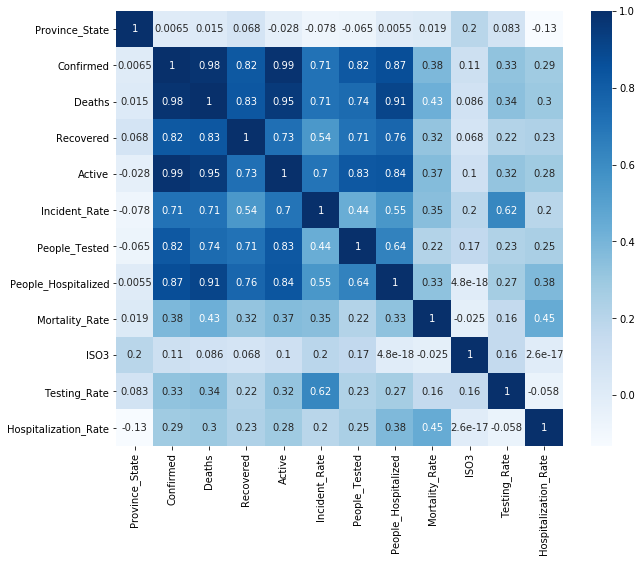

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(covid1,annot=True,cmap='Blues')
plt.show()

##### Observation:
    * Columns like confirmed,Deaths,Recovered,Active are highly correlated to each other

Text(0.5, 1.0, 'Correlation with target variable')

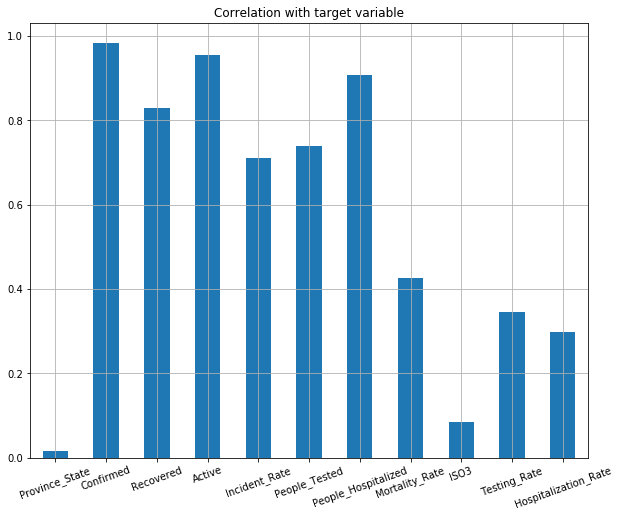

In [18]:
plt.figure(figsize=(10,8))
covid.drop('Deaths',axis=1).corrwith(covid['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('Correlation with target variable')

Text(0.5, 1.0, 'Correlation with target variable')

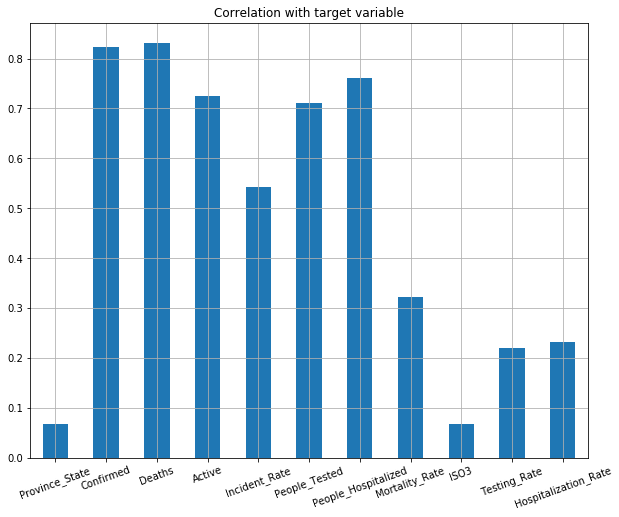

In [19]:
plt.figure(figsize=(10,8))
covid.drop('Recovered',axis=1).corrwith(covid['Recovered']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('Correlation with target variable')

## Univariate Analysis

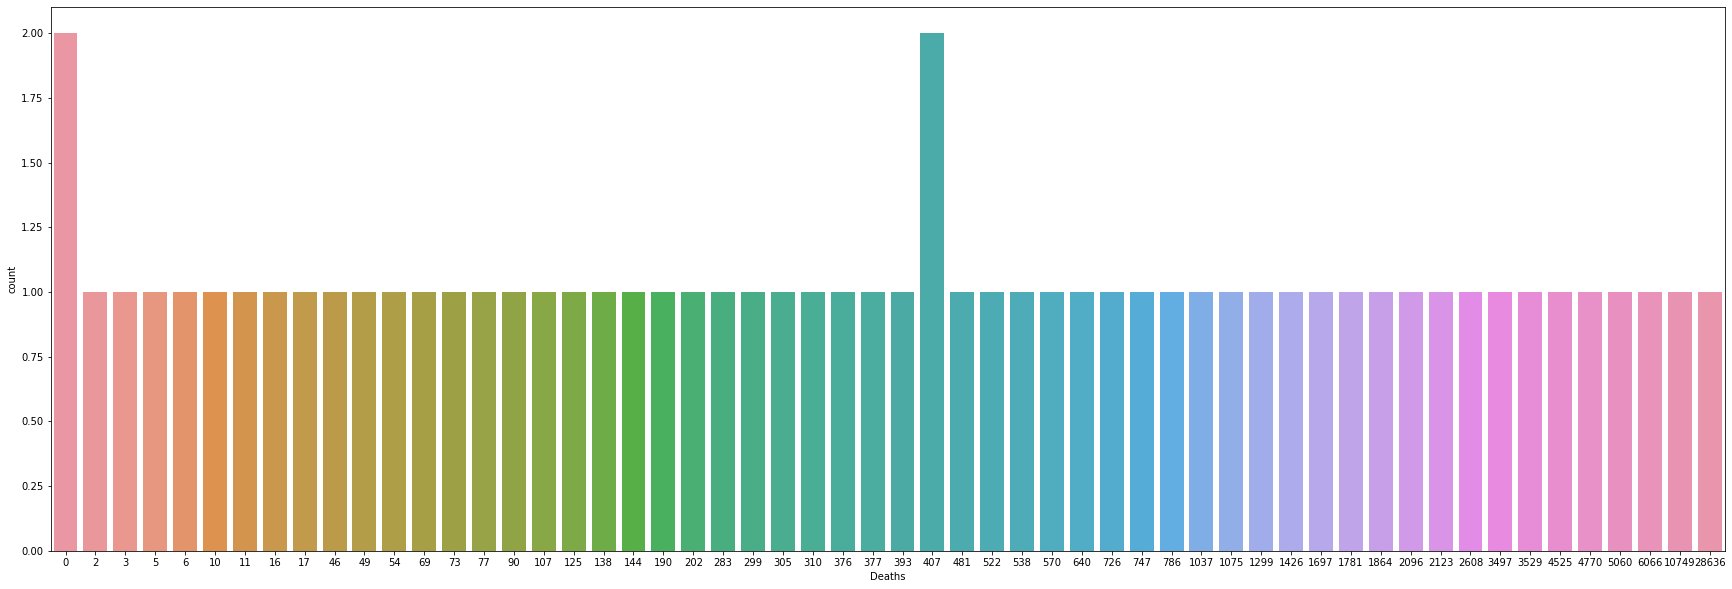

In [20]:
plt.subplots(figsize=(30,10))
sns.countplot(x='Deaths',data=covid)
plt.show()

##### Observation:
    Highest count no of deaths is 407.

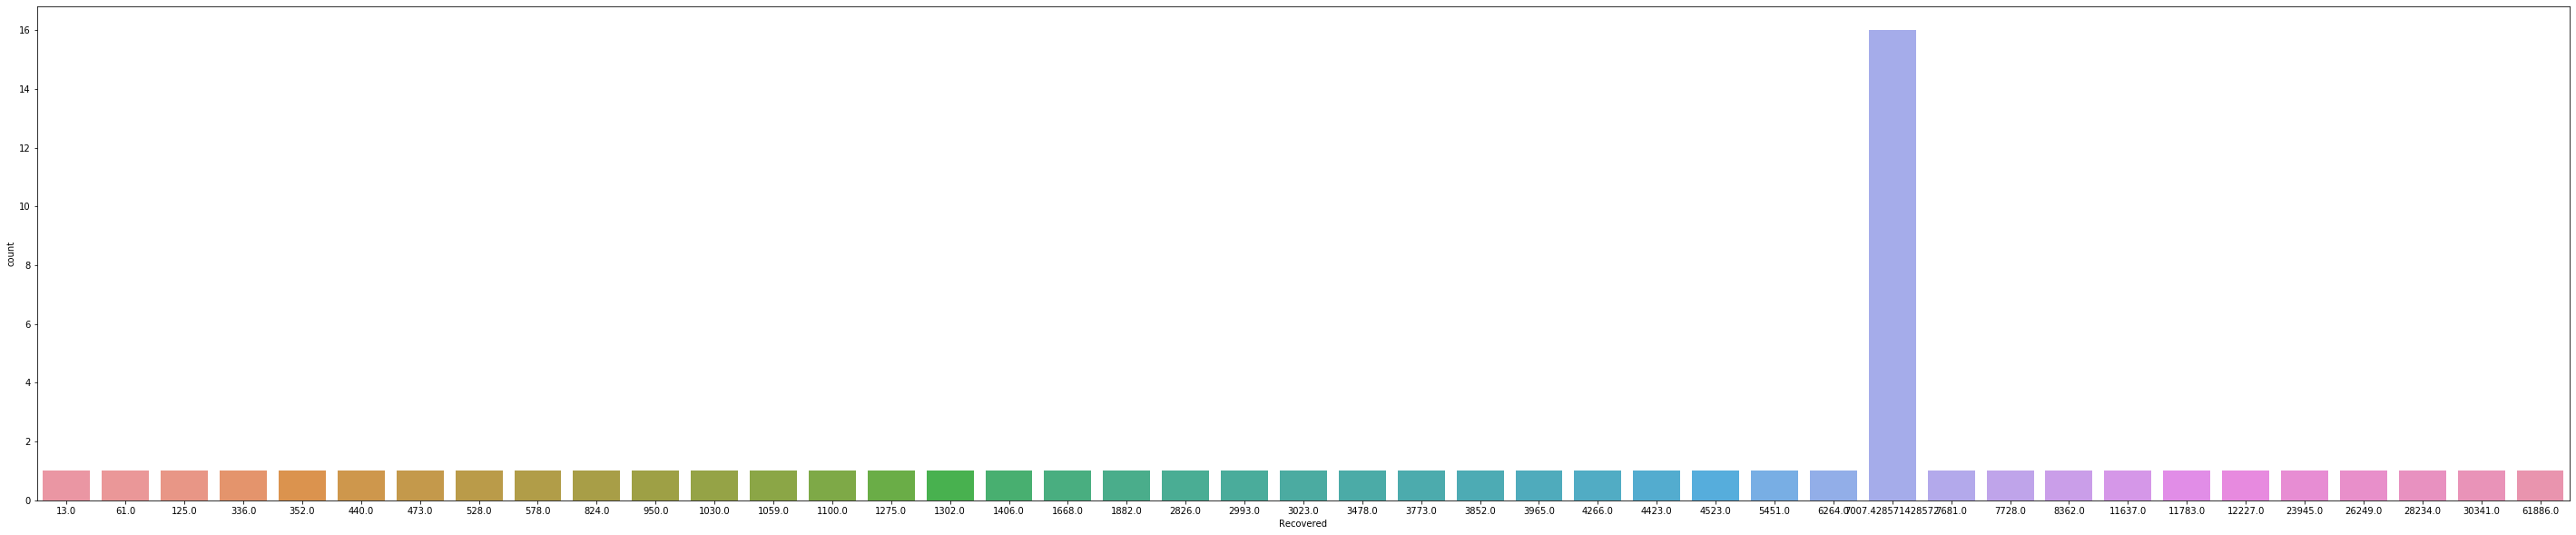

In [21]:
plt.subplots(figsize=(50,10))
sns.countplot(x='Recovered',data=covid)
plt.show()

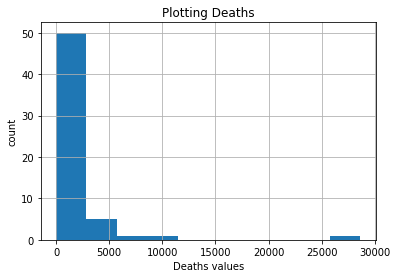

In [22]:
covid['Deaths'].hist()
plt.xlabel('Deaths values')
plt.ylabel('count')
plt.title('Plotting Deaths')
plt.show()

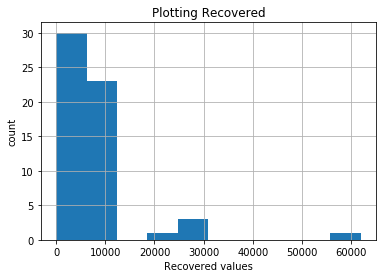

In [23]:
covid['Recovered'].hist()
plt.xlabel('Recovered values')
plt.ylabel('count')
plt.title('Plotting Recovered')
plt.show()

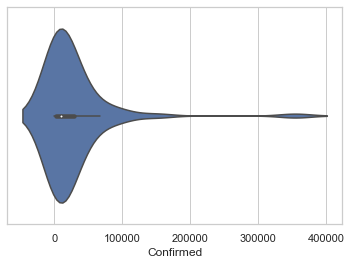

In [24]:
sns.set(style='whitegrid')
sns.violinplot(covid['Confirmed'])

## Bivariate Analysis

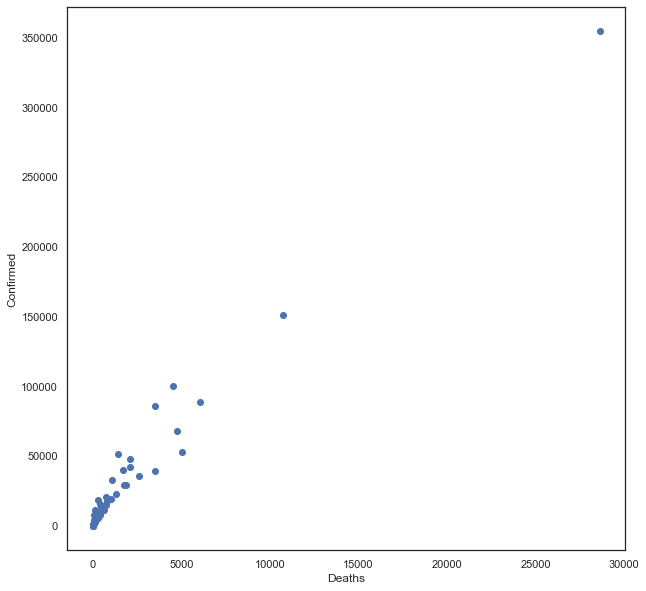

In [25]:
plt.figure(figsize=(10,10))
sns.set(style='white')
plt.scatter(covid['Deaths'],covid['Confirmed'])
plt.xlabel('Deaths')
plt.ylabel('Confirmed')
plt.show()

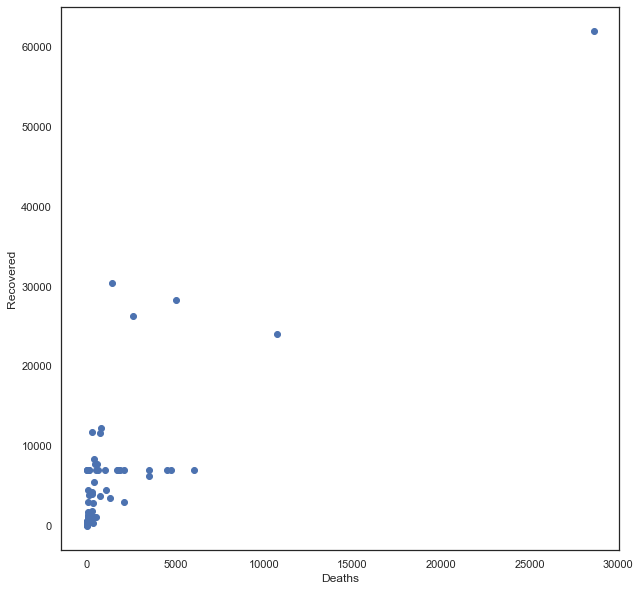

In [26]:
plt.figure(figsize=(10,10))
sns.set(style='white')
plt.scatter(covid['Deaths'],covid['Recovered'])
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.show()

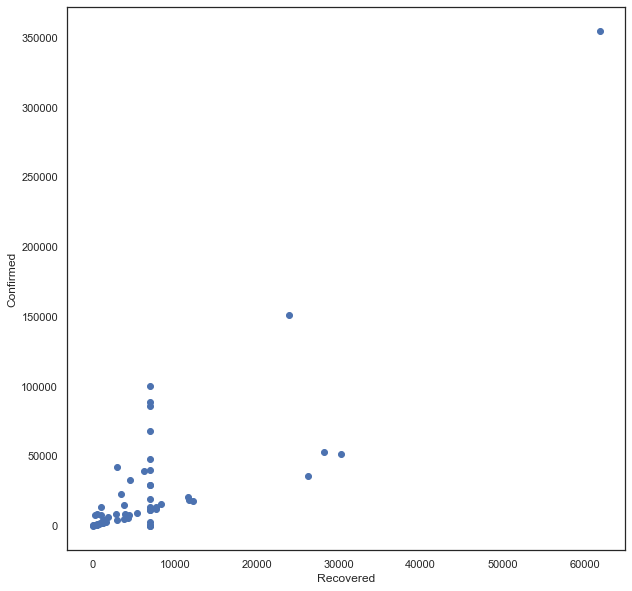

In [27]:
plt.figure(figsize=(10,10))
sns.set(style='white')
plt.scatter(covid['Recovered'],covid['Confirmed'])
plt.xlabel('Recovered')
plt.ylabel('Confirmed')
plt.show()

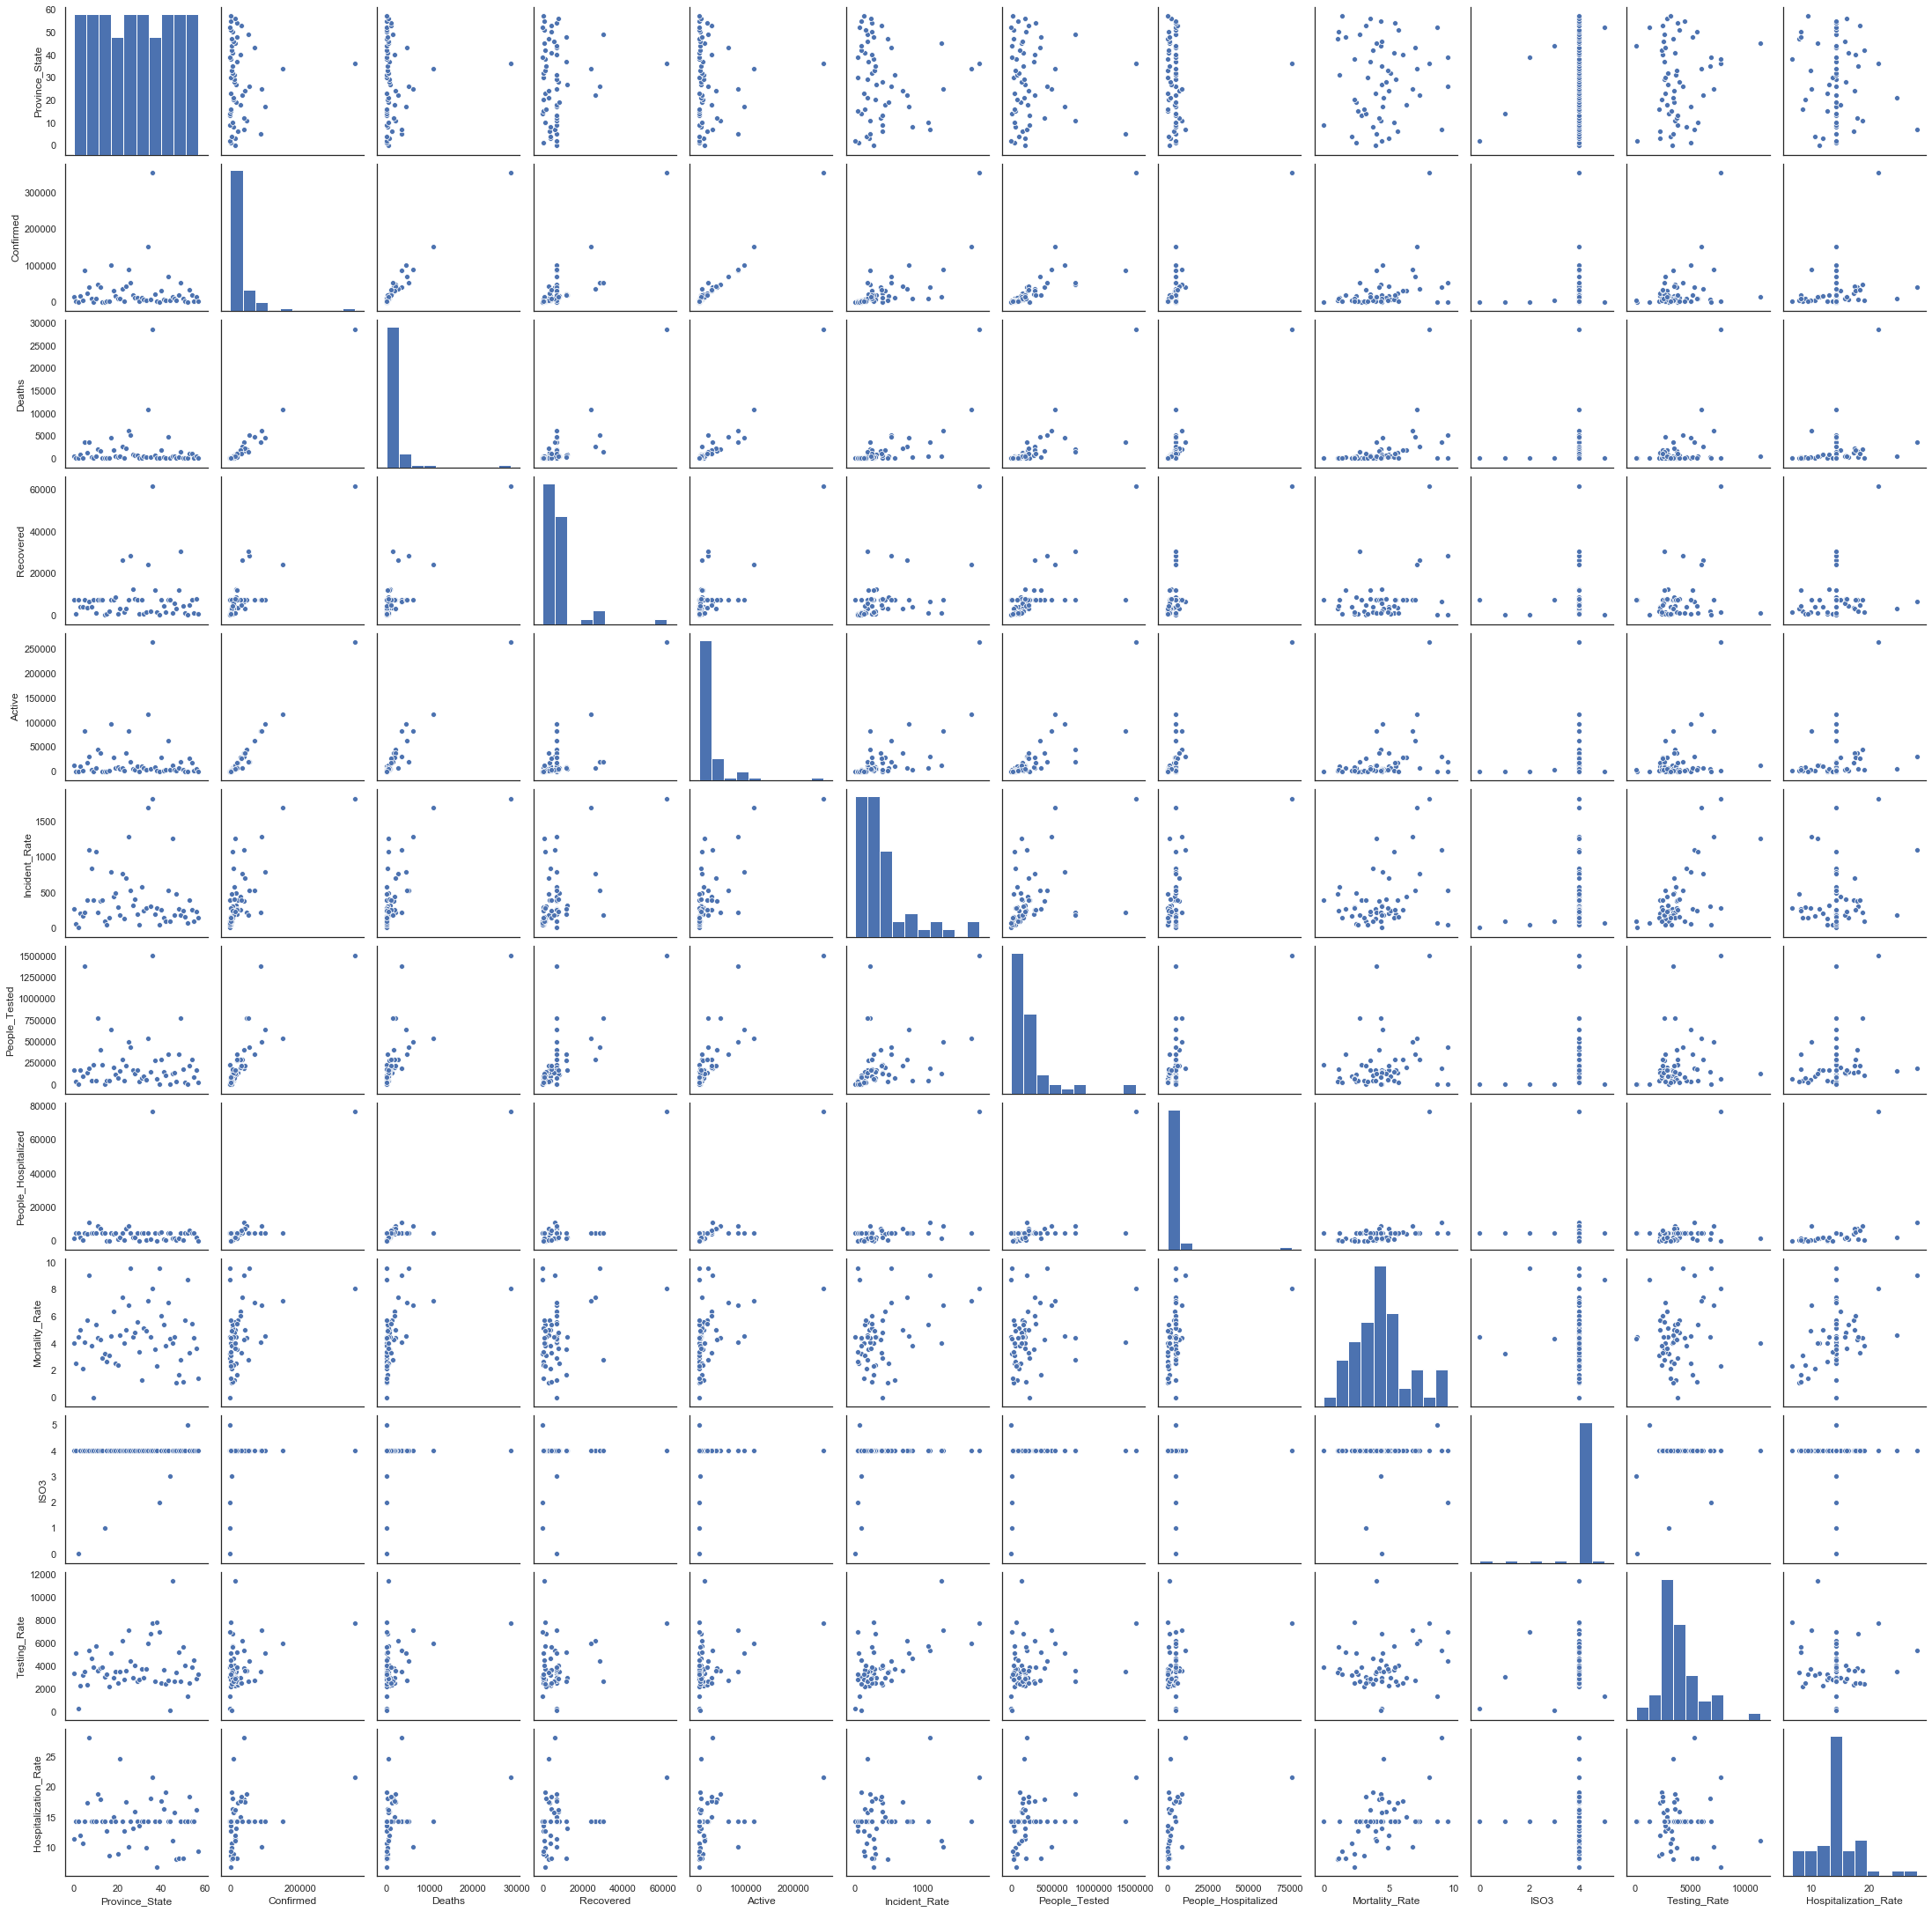

In [28]:
sns.pairplot(covid)

##### Obervation:
    Most of our data is right skewed.

## Checking Skewness of Data

In [29]:
covid.skew()

Province_State          0.000000
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

##### Observation:
    Most of Our data is postively skewed . 
    Data is highly skewed in columns like Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Hospitalized,Testing_Rate.
    ISO3 is negatively skewed but we can ignore .

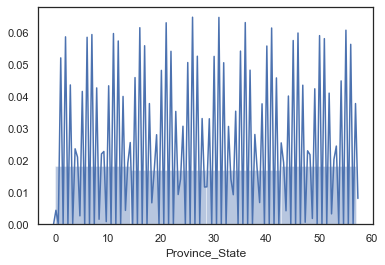

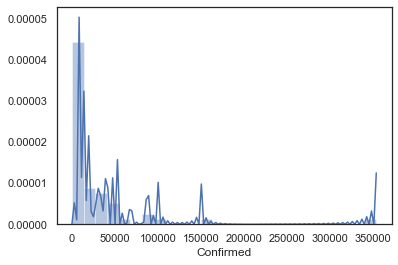

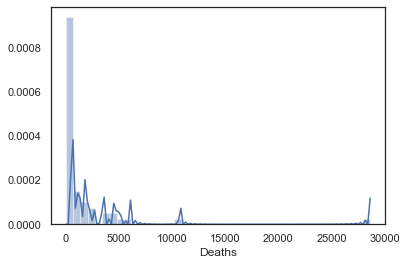

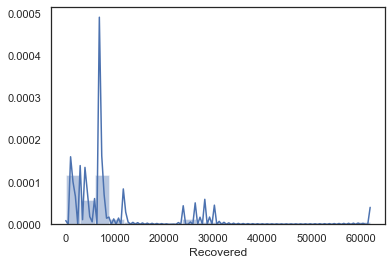

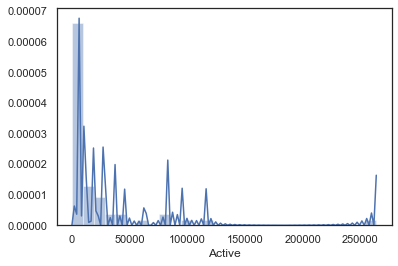

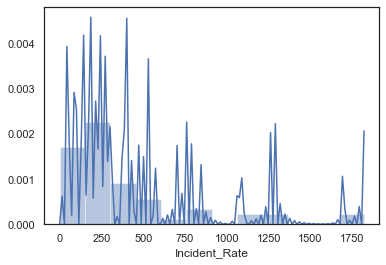

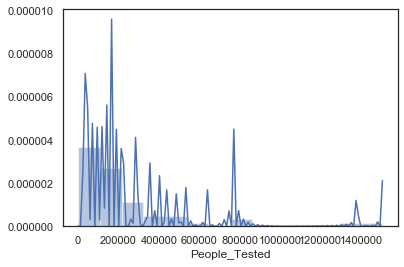

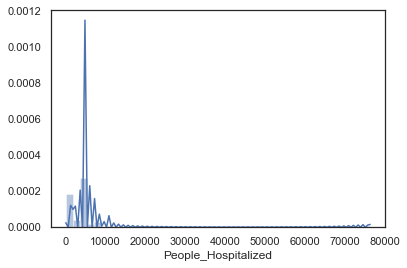

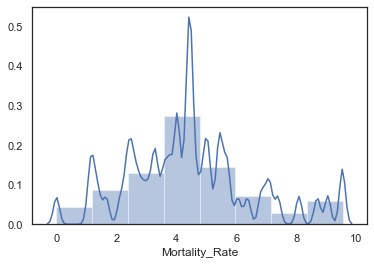

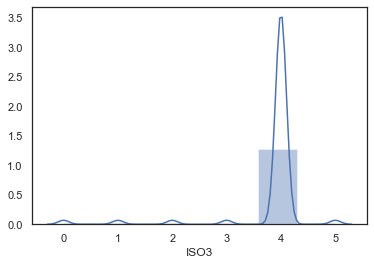

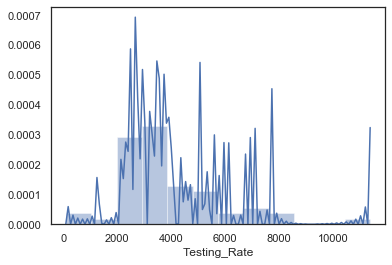

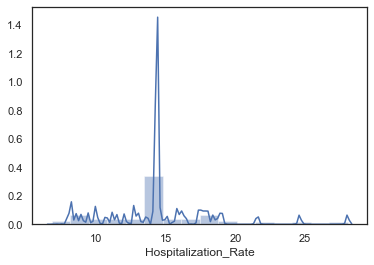

In [30]:
collist=covid.columns.values
ncol=15
nrow=10
for i in covid.columns:
    sns.distplot(covid[i],kde_kws={'bw':0.1})
    plt.show()

In [31]:
#Treating skewness via log method
for col in covid.columns:
    if covid[col].skew()>0.55:
        covid[col]=np.log1p(covid[col])

In [32]:
covid.skew()

Province_State          0.000000
Confirmed              -1.374603
Deaths                 -0.568714
Recovered              -1.124535
Active                 -0.994488
Incident_Rate          -1.807259
People_Tested          -1.628988
People_Hospitalized    -0.928480
Mortality_Rate          0.496115
ISO3                   -4.126625
Testing_Rate           -2.962747
Hospitalization_Rate   -0.300911
dtype: float64

##### Observation:
    Skewness reduced

## Plotting Outliers

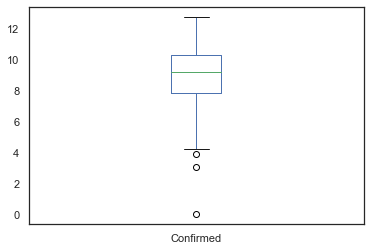

In [33]:
covid['Confirmed'].plot.box()

##### Observation:
    There some outliers in Confirmed.

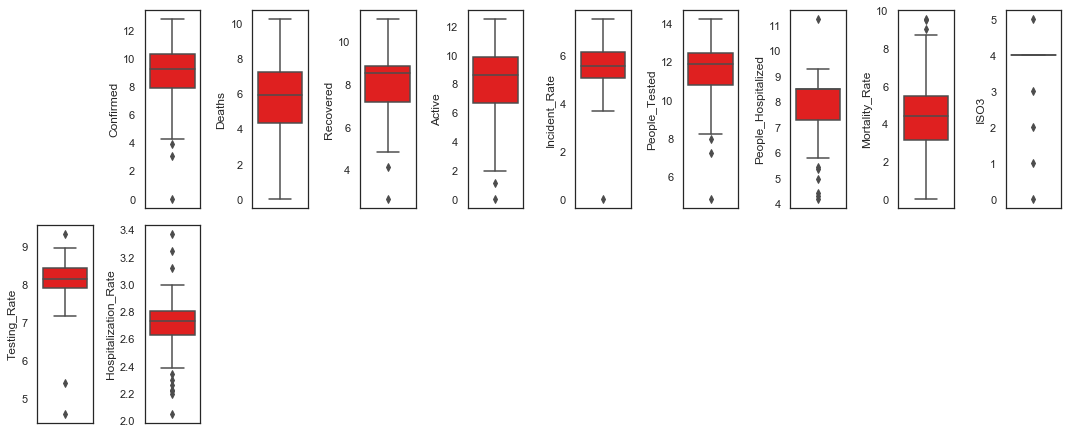

In [34]:
col=covid.columns.values
ncol=10
nrow=10
plt.figure(figsize=(15,30))
for i in  range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(covid[col[i]],color='red',orient='v')
    plt.tight_layout()

##### observation:
    There are outliers in all columns except Deaths column

## Removing Outliers

In [35]:
#Removing outliers
from scipy.stats import zscore
z_score=abs(zscore(covid))
print(covid.shape)
covid19=covid.loc[(z_score<3).all(axis=1)]
print(covid19.shape)

(58, 12)
(54, 12)


##### Observation:
    4 rows are removed as outliers.

## Model Training 

In [36]:
covid19.tail()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
53,53,10.401501,6.981006,8.417152,10.215045,5.957240,12.267295,8.709465,3.266683,4,7.820870,2.965888
54,54,9.850719,6.945051,8.854869,9.794509,5.521982,12.588341,8.496675,5.466238,4,8.255906,2.730629
55,55,7.357556,4.248495,6.857514,6.308098,4.482291,11.297775,8.496675,4.403318,4,8.411985,2.730629
56,56,9.504054,6.177944,8.952735,8.557375,5.444008,12.030015,7.678789,3.586073,4,7.966053,2.839735
57,57,6.669498,2.484907,6.270988,5.517453,4.919839,9.843791,4.317488,1.397713,4,8.088329,2.342075


## First let us consider Deaths as our target variable.

In [37]:
#Seprating into input and output variables
df_x=covid19.drop(['Deaths'],axis=1)

In [38]:
y=pd.DataFrame(covid19['Deaths'])

In [39]:
df_x.head()

,Province_State,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,0,9.476773,8.854869,9.435961,5.587976,12.010368,7.309212,3.999387,4,8.118190,2.520825
1,1,5.996452,5.866468,3.688879,4.022051,10.519916,8.496675,2.493766,4,8.530098,2.730629
3,3,9.609586,8.235891,9.248310,5.326851,12.016340,7.491645,5.011405,4,7.729234,2.566641
4,4,8.517993,8.256607,6.951772,5.116692,11.474798,6.284134,2.138717,4,8.067986,2.459040
5,5,11.362079,8.854869,11.320566,5.387457,14.137682,8.496675,4.066421,4,8.158772,2.730629


In [40]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [41]:
x.shape

(54, 11)

In [42]:
y.shape

(54, 1)

In [43]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## GridSearchCV

In [44]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue,cv=5)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9930235565918029
0.01
{'alpha': 0.01}


##### Observation:
     Alpha=0.01 is best parameter for Ridge()

In [45]:
from sklearn import svm
svr=svm.SVR()
parameters={'kernel':['linear','rbf','poly'],'C':[1.0]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'C': 1.0, 'kernel': 'linear'}


##### Observaton:
    Kernel=Linear,c:1 are the best parameters for SVR

In [46]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(kernel='linear'),Lasso(),Ridge(alpha=0.01),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=.20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean Absolute Error :',mean_absolute_error(y_test,predm))
    print('Mean Squared Error :',mean_squared_error(y_test,predm))
    print('r2_score',r2_score(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.9960975224167296
Error:
Mean Absolute Error : 0.0822937465421101
Mean Squared Error : 0.010721233234569897
r2_score 0.9973207306881076
*******************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 1.0
Error:
Mean Absolute Error : 0.6595489381414619
Mean Squared Error : 0.6316806017726834
r2_score 0.8421410658439773
*******************************************************************************************************


Score of KNeighborsRegre

##### Observation:
     Score of LinearRegression      = 99%  and r2_score = 99%
     Score of DecisionTreeRegressor = 100% and r2_score = 84%
     score of KNeighborsRegressor   = 85%  and r2_score = 85%
     Score of SVR                   = 99%  and r2_score = 99%
     Score of Lasso                 = 94%  and r2_score = 64%
     Score of Ridge                 = 99%  and r2-score = 99%
     Score of ElasticNet            = 81%  and r2_score = 75%
     Score of RandomForestRegressor = 98%  and r2_score = 88%
     Score of AdaBoostRegressor     = 98%  and r2_score = 80%
    

* From Above observation LinearRegression,SVR,Ridge gives same results but mean suqared_error is less in Linear Regression.

##### Checking cross_val_score

In [47]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(kernel='linear'),Lasso(),Ridge(alpha=0.01),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('*******************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: [0.99530959 0.9988506  0.99119424 0.99000706 0.98975556]
Mean score: 0.9930234106205449
Standard deviation: 0.003530036802878745
*******************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: [0.95594052 0.92894846 0.7285554  0.69670503 0.8587849 ]
Mean score: 0.8337868613205399
Standard deviation: 0.10437167851784547
*******************************************************************************************************


Score of KNeighborsRegre

##### Observation:
    Our model is well trained and LinearRegression is selected as best model because of less errors

## Saving the best model

In [48]:
import joblib
joblib.dump(LinearRegression,'covid.pkl')

['covid.pkl']

##### Conclusion:
    Hence LinearRegression is selected as best model for Deaths prediction.

## Now let us consider Recovered as our target variable.

In [49]:
covid19.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,0,9.476773,6.259581,8.854869,9.435961,5.587976,12.010368,7.309212,3.999387,4,8.118190,2.520825
1,1,5.996452,2.397895,5.866468,3.688879,4.022051,10.519916,8.496675,2.493766,4,8.530098,2.730629
3,3,9.609586,6.617403,8.235891,9.248310,5.326851,12.016340,7.491645,5.011405,4,7.729234,2.566641
4,4,8.517993,4.682131,8.256607,6.951772,5.116692,11.474798,6.284134,2.138717,4,8.067986,2.459040
5,5,11.362079,8.159947,8.854869,11.320566,5.387457,14.137682,8.496675,4.066421,4,8.158772,2.730629


In [50]:
#Seprating into input and output variables
df_x=covid19.drop(['Recovered'],axis=1)

In [51]:
y=pd.DataFrame(covid19['Recovered'])

In [52]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [53]:
x.shape

(54, 11)

In [54]:
y.shape

(54, 1)

In [55]:
x.head()

,Province_State,Confirmed,Deaths,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,-1.727396,0.215602,0.193006,0.470137,-0.114547,0.160995,-0.289065,-0.189506,-0.137361,-0.243397,-0.700371
1,-1.667371,-1.655246,-1.666465,-1.934802,-1.945679,-1.099787,0.563533,-0.922459,-0.137361,0.817501,0.124800
2,-1.547320,0.286996,0.365304,0.391612,-0.419897,0.166047,-0.158078,0.303155,-0.137361,-1.245182,-0.520177
3,-1.487295,-0.299790,-0.566564,-0.569403,-0.665648,-0.292047,-1.025070,-1.095301,-0.137361,-0.372700,-0.943375
4,-1.427269,1.229049,1.108067,1.258774,-0.349027,1.960503,0.563533,-0.156874,-0.137361,-0.138875,0.124800


In [56]:
y.head()

,Recovered
0,8.854869
1,5.866468
3,8.235891
4,8.256607
5,8.854869


### GridesearchCV

In [57]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue,cv=5)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7383636779017813
0.1
{'alpha': 0.1}


##### Observation:
    alpha=0.1 is the parameter for Ridge()

In [58]:
from sklearn import svm
svr=svm.SVR()
parameters={'kernel':['linear','rbf','poly'],'C':[1.0]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'C': 1.0, 'kernel': 'linear'}


##### Observation:
    c:1,Kernel=Linear are the best parameters for SVR

In [59]:
max_r_score=0
for r_state in range (10,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r_scr=r2_score(y_test,y_pred)
    if r_scr>max_r_score:
        max_r_score=r_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state,"is",max_r_score)   
# i have checked each and every model in that max r2_score is for linearRegression.

max r2 score corresponding to  42 is 0.885034187381072


##### Observation:
    Max r2 score corresponding to 42 is 0.88 .Hence our random_ state is 42

In [60]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(kernel='linear'),Lasso(),Ridge(alpha=0.1),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean Absolute Error :',mean_absolute_error(y_test,predm))
    print('Mean Squared Error :',mean_squared_error(y_test,predm))
    print('r2_score',r2_score(y_test,predm))
    print('*******************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.7920937359327596
Error:
Mean Absolute Error : 0.3917509844714036
Mean Squared Error : 0.278662188428582
r2_score 0.885034187381072
*******************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 1.0
Error:
Mean Absolute Error : 0.7941766166417807
Mean Squared Error : 1.2622009117199058
r2_score 0.47926213340056034
*******************************************************************************************************


Score of KNeighborsRegresso

##### Observation:
     Score of LinearRegression      = 79%  and r2_score = 88%
     Score of DecisionTreeRegressor = 100% and r2_score = 52%
     score of KNeighborsRegressor   = 54%  and r2_score = 43%
     Score of SVR                   = 74%  and r2_score = 90%
     Score of Lasso                 =  0%  and r2_score = 0%
     Score of Ridge                 = 78%  and r2-score = 89%
     Score of ElasticNet            = 31%  and r2_score = 40%
     Score of RandomForestRegressor = 93%  and r2_score = 62%
     Score of AdaBoostRegressor     = 96%  and r2_score = 64%
    

* From Above observation LinearRegression,SVR,Ridge gives nearly same results but r2_score is more in SVR.

### Checking cross_val_score

In [61]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(kernel='linear'),Lasso(),Ridge(alpha=0.1),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('*******************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: [0.5261853  0.73237621 0.67899277 0.87895275 0.84824967]
Mean score: 0.7329513389988929
Standard deviation: 0.12670767243910205
*******************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: [-0.16952382  0.41175506  0.42479139  0.11187805  0.76507587]
Mean score: 0.3087953098127202
Standard deviation: 0.31616873633337406
*******************************************************************************************************


Score of KNeighborsR

##### Obervation:
    mean is better in LinearRegression.so we can select LinearRegression as our best model.

## Saving the best model

In [62]:
import joblib
joblib.dump(LinearRegression,'covid19.pkl')

['covid19.pkl']